# Exercise 8

In [3]:
# import the packages we are going to be using
import numpy as np # for getting our distribution
import pandas as pd # to handle data frames
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting
from scipy import stats # to compute statistics

1. Run a simple linear regression relating the species richness with each one of the continuous
environmental variables in the dataset: Altitude, Actual_river_slope, Elevation_mean_catch,
prec_ann_catch, temp_ann, temp_jan, temp_jul. Before running the analyses, check if any of the
variables requires to be transformed and apply the appropriate transformation. Compute the
regression coefficient estimates, the r-square and the F-statistics. You may plot the fitted model.

In [4]:
# Read in data
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")
df.head()

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
0,ES_01_0002,38.102003,-4.096070,Spain,Guadalquivir,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Add species richness column (ex7)
# ID the first species column
species_start = df.columns.get_loc('Abramis brama')

# Get everything from species start to the end of the df
species_df = df.iloc[:, species_start:]

# Convert absence and presence to 0/1
species_binary = (species_df > 0).astype(int)

# Sum across each row to get species richness
df['species_richness'] = species_binary.sum(axis=1)

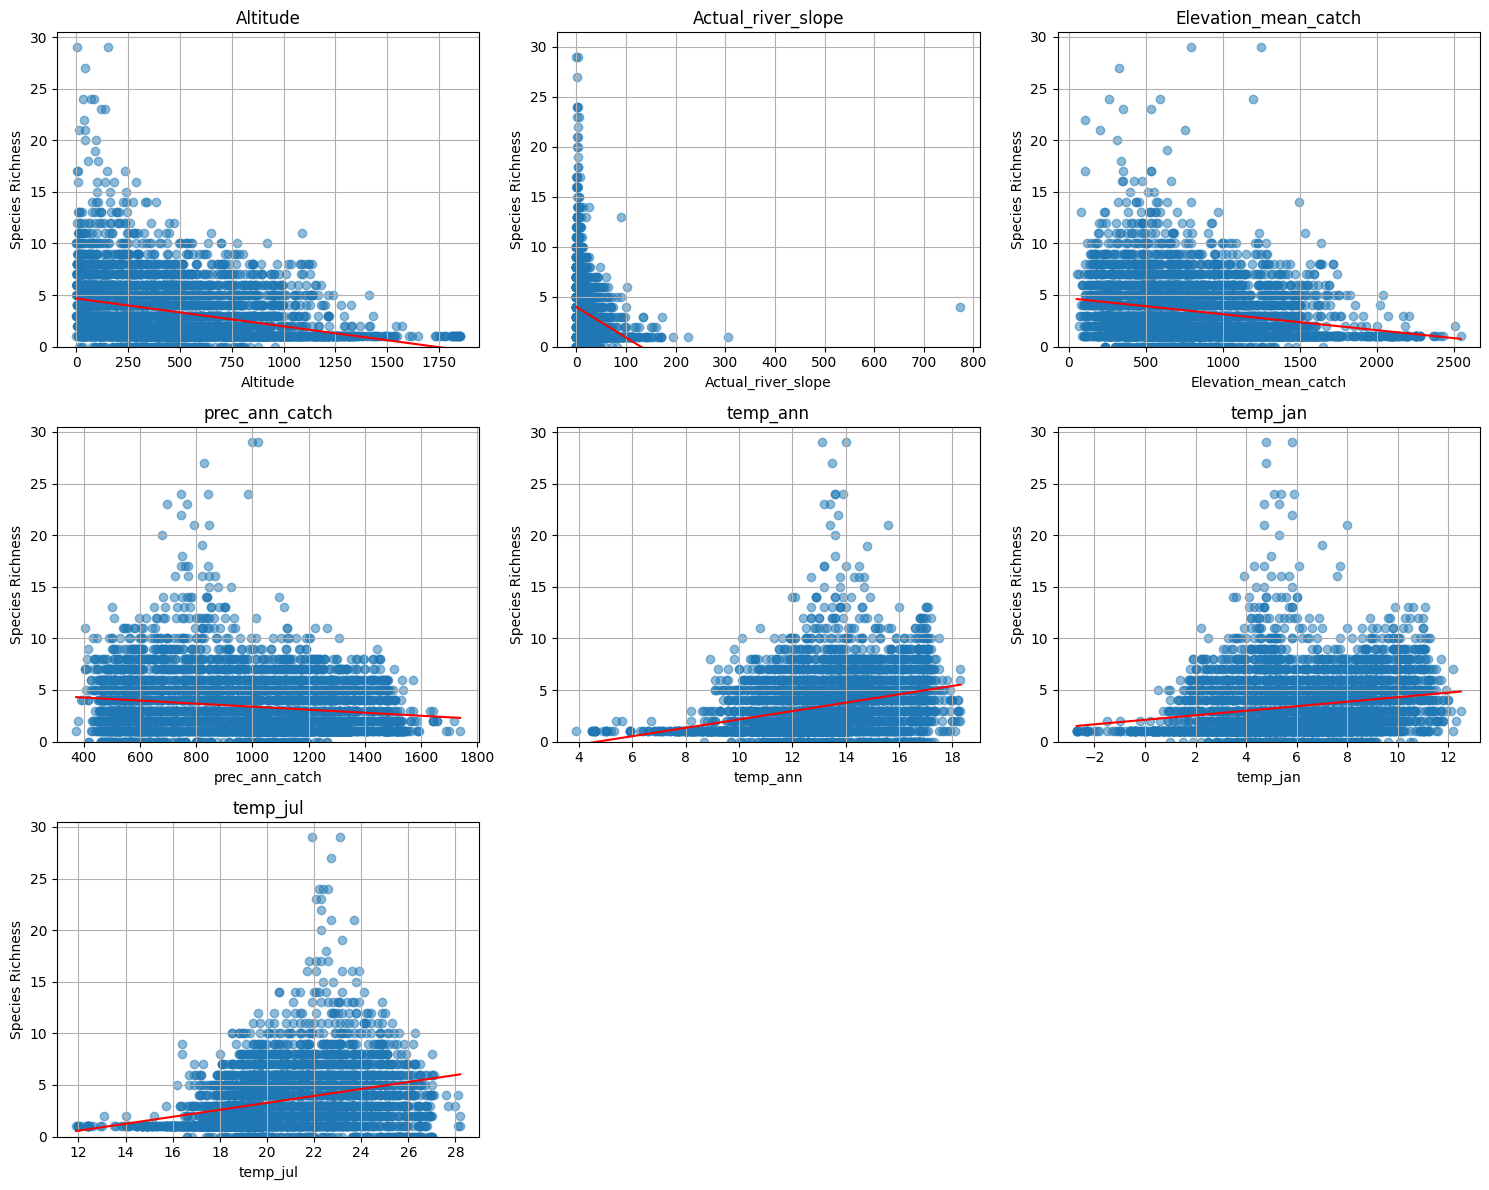

In [17]:
# List of x-variable column names to loop through
x_vars = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 
          'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']
y = df["species_richness"]

# Define number of subplots
n_vars = len(x_vars)
n_cols = 3
n_rows = int(np.ceil(n_vars / n_cols))

# Create figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()  # Flatten in case of single row

for i, x_var in enumerate(x_vars):

    # if x_var == "Actual_river_slope":
    #     print(f"Slope: {slope:.4f}, Intercept: {intercept:.4f}")
    #     print(f"Min x: {x_clean.min()}, Max x: {x_clean.max()}")
    
    ax = axes[i]
    x = df[x_var]
    y_clean = y
    # Drop rows with missing values in x or y
    mask = x.notna() & y_clean.notna()
    x_clean = x[mask]
    y_clean = y_clean[mask]
    
    # Linear regression
    slope, intercept, r, p, std_err = stats.linregress(x_clean, y_clean)
    
    # Sorted x values for line
    x_sorted = np.linspace(x_clean.min(), x_clean.max(), 100)
    y_pred = intercept + slope * x_sorted
    
    # Plot scatter and regression line
    ax.scatter(x_clean, y_clean, alpha=0.5)
    ax.plot(x_sorted, y_pred, color="red")
    ax.set_title(f"{x_var}")
    ax.set_xlabel(x_var)
    ax.set_ylabel("Species Richness")
    ax.grid(True)
    ax.set_ylim(bottom=0)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Compute the regression coefficient estimates, the r-square and the F-statistics. You may plot the fitted model.